# Liner Regression analysis of the 3D prinitng dataset

### In this notebook, we will perform simple linear regression analysis of the 3D printing dataset and study the various relationships existing between the target variables labels and the predictor varibale features.

## 1. Importing the Dataset in to the notebook
- In this section, we will **import** the `3d printer for mechanical engineers.csv` file into the **workbook** and look at some **basic information** like *number of rows* and *columns*, their *datatypes*, *notes* (if any), *missing values* (if any).
- Before importing the dataset, let's **import** the **basic libraries** for machine learning like `pandas`, `numpy`, `matplotlib` and `seaborn`

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To enable matplot visualization
%matplotlib inline

In [3]:
#Importing the Dataset using .read_csv() function of pandas
#We will call the dataset as 'printer'

printer = pd.read_csv('/3DPrinting_data')

In [4]:
#Let's check few rows of the dataset using the .head() function of pandas
printer.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


## The publisher of this dataset left few information regarding the dataset. I will put them here
- The dataset contains **12 columns**.
- The **first 9 columns** i.e from layer_height to fan_speed are **features**.
- The **last 3 columns** i.i from roughness to elongation are **labels**. So, we will be **predicting** these **three** based on the **9 features**.
- The various **units** of the **nine features** are as follows:
                   1. Layer Height in mm
                   2. Wall Thickness in mm
                   3. Infill Density in %
                   4. Infill Pattern in either Grid or Honeycomb
                   5. Nozzle Temperature in Degree C
                   6. Bed Temperature in degree C
                   7. Print speed in mm/s
                   8. Material in either abs or pla
                   9. Fan Speed in %
- The **units** of the **labels** are as follows
                   1. Roughness in micro metre
                   2. Tension Strength in MPa
                   3. Elongation in %
        

## Pictures of Infill patterns and Filament materials
![Infill patterns](https://howto3dprint.net/wp-content/uploads/2022/04/Simplify3D-infill-patterns.jpg)
![Infill Material](https://i.pinimg.com/564x/45/f3/97/45f397ad978c10c7499a323c690505e3.jpg)

In [5]:
# Basic information of the dataset using .info() function of pandas
printer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


### Basic information
- The dataset contains **50 rows** of data.
- The columns `infill_pattern` and `material` consists of **categorical entries** (infill_pattern = grid or honeycomb and material = abs or pla)  **instead** of **numerical** entries.
- In the **Machine Learning World** this is relatively a **very small dataset** interms of observations. **Still** we can **fit** a good **regression model** out of it and study them.

## 2. Data Visualization

In this section we will **visualize** the **data** in the form of **heatmaps** and **pairplots** 

Here we will consider the roughness as the only label and we will predict that using the 9 features.

First, let's convert the categorical features into numerical ones using the `.replace()` function of numpy

We will replace infill_pattern and material as follows
*            `Grid` as **0** and `honeycomb` as **1**
*            `abs` as **0** and `pla` as **1**

In [6]:
printer['infill_pattern'].replace(['grid','honeycomb'], [0,1], inplace = True)
printer['material'].replace(['abs','pla'], [0,1], inplace = True)

In [7]:
#let's view the first 10 observations
printer.head(10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7
5,0.02,10,40,1,200,60,40,1,0,60,24,1.1
6,0.02,5,10,0,205,65,40,1,25,55,12,1.3
7,0.02,10,10,1,210,70,40,1,50,21,14,1.5
8,0.02,9,70,0,215,75,40,1,75,24,27,1.4
9,0.02,8,40,1,220,80,40,1,100,30,25,1.7


Perfect. Now we have **converted** all the **categorical** variables **into numerical** ones.

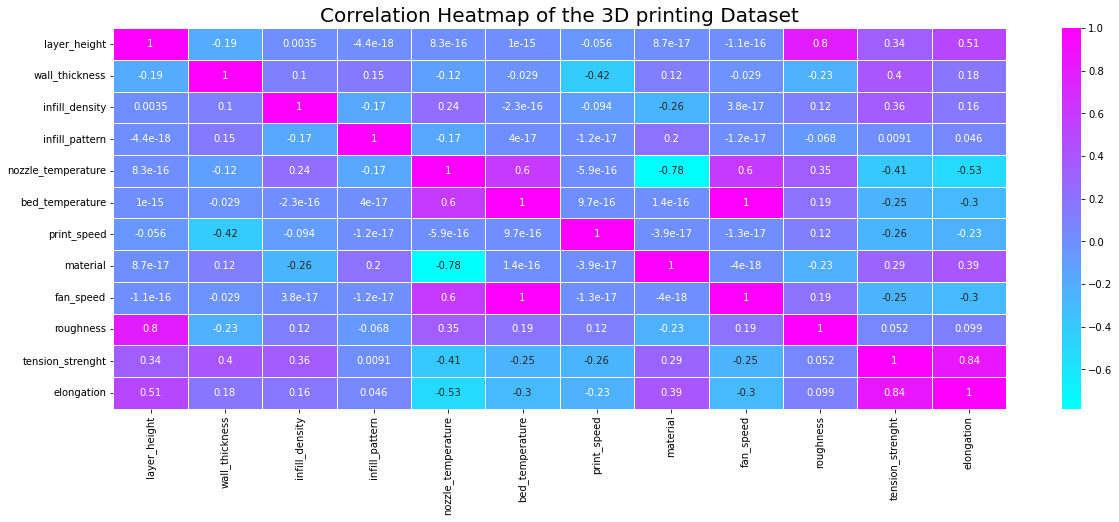

In [8]:
# Creating the heatmap
# First create a space for the heatmap and then draw the heatmap inside the space

fig, ax = plt.subplots(figsize = (20,7))

#Title for the heatmap
title = 'Correlation Heatmap of the 3D printing Dataset'
plt.title(title, fontsize = 20)
ttl = ax.title

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(printer.corr(), cbar = True, cmap = 'cool', annot = True, linewidths = 1, ax = ax)

#enable visualization using .show() function of matplot
plt.show()

### Inference from Heatmap:

1. **Roughness** is **correlated** to **layer height** meaning as layer height (feature) increases, roughness increases as well.
2. **Material** is **negatively correlated** with **nozzle temperarure**. So, if nozzle temperature increases, the material quality dimnishes.
3. **Bed temperature** is **correlated** with **nozzle temperature**. As nozzle temperature increases, bed temperature increases.
4. **Fan speed** is **positively correlated** with **nozzle temperature** as well.
5. **Fan speed** is **full positively correlated** (1) with **bed temperature**.
6. The **labels elongation and tension strength** are **positively correlated** as well.

We will take these **heatmap inferences** into **consideration later** when we are in **tuning the model**. **For building** the model, we will use **all the features** in **predicting the label**. We will use `statsmodels` library to perform these **linear regressions**.

### Train Test Split
Whenever we are building the model, we will **perform a train-test split** on the dataset. The **train data** will be used for **building the model** and the **test data** will be used to **evaluate the fit** or **accuracy** of the model.

![train-test-evaluation](https://miro.medium.com/max/1400/1*Hs7RCpyvj4NrjANdwiFHaQ@2x.jpeg)

However our **dataset** contains only **50 observations**, so we will use the **entire dataset** for **training the model**.

# Model 1 : Predicting roughness based on 9 features.
- Here we will be **building** a **multiple linear regression** model to **predict** `roughness` based on all the 9 features from `layer_height` to `fan_speed`

In [9]:
# Defining features and labels
X = printer.drop(['roughness','tension_strenght','elongation'], axis = 1)
y = printer['roughness']

In [10]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [11]:
#importing statsmodels library
import statsmodels.api as sm

In [12]:
# let's define a function for the multiple regression

def linear_Regression(x,y):
    
    x = sm.add_constant(x)
    
    #defining the model, fitting the model and printing the results
    multiple_model = sm.OLS(y,x).fit()
    print(multiple_model.summary())

In [13]:
#calling the linear regression function
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     35.95
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           3.83e-16
Time:                        12:50:37   Log-Likelihood:                -248.19
No. Observations:                  50   AIC:                             514.4
Df Residuals:                      41   BIC:                             531.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9534      0

### Inference from model
1. The **R-squared** value is **0.875 ot 87.5%** which states that **about 87.5%** of proportion of **variability** in data can be **explained** by this **linear regression model**. The **r-squared** is the most **important parameter** for a **model evaluation**. higher the value, better is the fit.

2. The **p-value** is an **important measure** for evaluating the various **variables**. **Closer** is the **p-value to 1**, the **lesser** is that **feature variable** has to do with the **label variable**. In our model, **wall thickness, infill_density and infill_pattern** are all close to 1 meaning they **don't** play **much role** in roughness.

3. Finally, the **expression** for this model can be written from the **coefficients** as follows

`Roughness = -0.9534 + 1269.4449*layer_height + 2.3342*wall_thickness - 0.0423*infill_density - 0.1255*infill_pattern + 15.0562*nozzle_temperature - 55.6225*bbed_temperature + 0.6496*print_speed + 298.4514*material + 7.8989*fan_speed`

4. The coefficients suggest the following
   - In the **absence** of all the **parameters**, the **roughness decreases** by **0.9534 micro metre** by the constant term. This may be **due** to **other factors** like **ambient temperature** which are **not considered** for the model.
   - A **positive coefficient value** states that an **increase in wall thickness** (example) by 1 mm results in **increase in roughness** by 2.3342 micro metre.
   - Similarly, **a negative coefficient value** states that an **increase in bed temperature** by a degree C causes **55.6225 micro metre decrease** in roughness.

### Now let's eliminate `wall thickness`, `infill density` and `infill pattern` and build the model to see if there's any improvement.

In [14]:
#check X
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [15]:
X = X.drop(['wall_thickness','infill_density','infill_pattern'], axis = 1)

In [16]:
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [17]:
#calling the linear regression function
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.67e-18
Time:                        12:50:37   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9307      0

## Inference
1. The **R-squared** value decreases to **87.2%** which is **not much decrease**.
2. The **p-values** of all the **considered features** do play an **important role** in predicting the label.
3. We can **improve** the **model** further by considering **interaction terms** based on the **correlation heatmap**.
4. The various interaction terms are as follows
    - Material and nozzle temperature (-0.78)
    - Bed temperature and nozzle temperature (0.6)
    - Fan speed and nozzle temperatue (0.6)
    - Fan speed and bed temperature (1)

In [18]:
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [19]:
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [20]:
#get the interaction terms by multiplying values

inter_mn = X['material']*X['nozzle_temperature']
inter_bn = X['bed_temperature']*X['nozzle_temperature']
inter_fn = X['fan_speed']*X['nozzle_temperature']
inter_fb = X['fan_speed']*X['bed_temperature']

In [21]:
#adding these interaction terms to dataset using .concat() function of pandas
#we will call this dataset as interaction

interaction = pd.concat([X,inter_mn,inter_bn,inter_fn,inter_fb], axis = 1)

#chenge column names of this interaction terms
interaction = interaction.rename(columns = {0:'interct_mn', 1:'interact_bn', 2:'interact_fn',
                             3:'interact_fb'})

interaction.head(10)

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,interct_mn,interact_bn,interact_fn,interact_fb
0,0.02,220,60,40,0,0,0,13200,0,0
1,0.02,225,65,40,0,25,0,14625,5625,1625
2,0.02,230,70,40,0,50,0,16100,11500,3500
3,0.02,240,75,40,0,75,0,18000,18000,5625
4,0.02,250,80,40,0,100,0,20000,25000,8000
5,0.02,200,60,40,1,0,200,12000,0,0
6,0.02,205,65,40,1,25,205,13325,5125,1625
7,0.02,210,70,40,1,50,210,14700,10500,3500
8,0.02,215,75,40,1,75,215,16125,16125,5625
9,0.02,220,80,40,1,100,220,17600,22000,8000


In [22]:
# NOw let's fit this model to the linear regression function

linear_Regression(interaction,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     63.22
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.31e-20
Time:                        12:50:38   Log-Likelihood:                -235.45
No. Observations:                  50   AIC:                             488.9
Df Residuals:                      41   BIC:                             506.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0735      0

## Model Summary
- Alright now, we have an increased R-squared of 92.5% or 0.925 which is very high.
- We will stop here and declare this model as the most suitable for predicting roughness

## Roughness = -1.0735 + 1246.5353*layer_height + 0.0050*nozzle_temperature - 57.8032*bed_temperature + 0.5538*print_speed + 5516.1791*material + 33.0427*fan_speed -25.7036*intercation_material_nozz_temp + 0.2588*interaction_bed_temp_nozz_temp - 0.2032fan_speed*noz_temp + 0.1662interact_fan_speed_bed_temp

## Similarly we will fit models for predicting tension strength and elongation as well. I will reduce the explanations here. The procedure is absolutely same starting with all features and then tuning for better results.

# Model 2: Predicting Tension strength based on features

In [23]:
X = printer.drop(['roughness','tension_strenght','elongation'], axis = 1)
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [24]:
y = printer['tension_strenght']
y

0     18
1     16
2      8
3     10
4      5
5     24
6     12
7     14
8     27
9     25
10    37
11    12
12    16
13     9
14    10
15    27
16    23
17    26
18    33
19    29
20    16
21    12
22    10
23    19
24     8
25    11
26    12
27    18
28    34
29    14
30    27
31    19
32    18
33     9
34    13
35    33
36    24
37    26
38    22
39     4
40    35
41    34
42    28
43    28
44    21
45    28
46    14
47    30
48    29
49    27
Name: tension_strenght, dtype: int64

In [25]:
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     10.55
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           6.91e-08
Time:                        12:50:38   Log-Likelihood:                -151.94
No. Observations:                  50   AIC:                             321.9
Df Residuals:                      41   BIC:                             339.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0663      0

In [26]:
X = X.drop(['infill_pattern','print_speed','material'], axis = 1)
X.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,fan_speed
0,0.02,8,90,220,60,0
1,0.02,7,90,225,65,25
2,0.02,1,80,230,70,50
3,0.02,4,70,240,75,75
4,0.02,6,90,250,80,100


In [27]:
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.07e-08
Time:                        12:50:38   Log-Likelihood:                -154.73
No. Observations:                  50   AIC:                             321.5
Df Residuals:                      44   BIC:                             332.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0191      0

In [28]:
interaction = pd.concat([X,inter_mn,inter_bn,inter_fn,inter_fb], axis = 1)

interaction = interaction.rename(columns = {0:'interct_mn', 1:'interact_bn', 2:'interact_fn',
                             3:'interact_fb'})

interaction.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,fan_speed,interct_mn,interact_bn,interact_fn,interact_fb
0,0.02,8,90,220,60,0,0,13200,0,0
1,0.02,7,90,225,65,25,0,14625,5625,1625
2,0.02,1,80,230,70,50,0,16100,11500,3500
3,0.02,4,70,240,75,75,0,18000,18000,5625
4,0.02,6,90,250,80,100,0,20000,25000,8000


In [29]:
linear_Regression(interaction,y)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     13.03
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           4.06e-09
Time:                        12:50:38   Log-Likelihood:                -148.27
No. Observations:                  50   AIC:                             314.5
Df Residuals:                      41   BIC:                             331.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0870      0

## No further improvement for tension strength in linear regression

# Model 3 : Predicitng Elongation based on the features

In [30]:
printer.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [31]:
X = printer.drop(['roughness','tension_strenght','elongation'], axis = 1)
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [32]:
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     10.55
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           6.91e-08
Time:                        12:50:39   Log-Likelihood:                -151.94
No. Observations:                  50   AIC:                             321.9
Df Residuals:                      41   BIC:                             339.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0663      0

In [33]:
X = X.drop(['infill_pattern','print_speed'], axis = 1)
X.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,material,fan_speed
0,0.02,8,90,220,60,0,0
1,0.02,7,90,225,65,0,25
2,0.02,1,80,230,70,0,50
3,0.02,4,70,240,75,0,75
4,0.02,6,90,250,80,0,100


In [34]:
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     14.33
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           6.78e-09
Time:                        12:50:39   Log-Likelihood:                -152.42
No. Observations:                  50   AIC:                             318.8
Df Residuals:                      43   BIC:                             332.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0646      0

In [35]:
interaction = pd.concat([X,inter_mn,inter_bn,inter_fn,inter_fb], axis = 1)

interaction = interaction.rename(columns = {0:'interct_mn', 1:'interact_bn', 2:'interact_fn',
                             3:'interact_fb'})

interaction.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,material,fan_speed,interct_mn,interact_bn,interact_fn,interact_fb
0,0.02,8,90,220,60,0,0,0,13200,0,0
1,0.02,7,90,225,65,0,25,0,14625,5625,1625
2,0.02,1,80,230,70,0,50,0,16100,11500,3500
3,0.02,4,70,240,75,0,75,0,18000,18000,5625
4,0.02,6,90,250,80,0,100,0,20000,25000,8000


In [36]:
linear_Regression(interaction,y)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     11.30
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.54e-08
Time:                        12:50:39   Log-Likelihood:                -148.26
No. Observations:                  50   AIC:                             316.5
Df Residuals:                      40   BIC:                             335.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0781      0

## Elonagtion and Tension_strength are strongly correlated to one another and both don't behave linearly.

# Summary

1. In this notebook, we have studied about the relationship between the 9 features and the 3 features.
2. The label roughness behaves perfectly with the 9 features whereas tension strength and elongation behave linearly only for about 72% each which is pretty good but not quite accurate. They can be resolved by polynomial regression which is not the case of interest in here.
3. So, this is how you perform a Linear regression study on a given dataset.

## If you like the work, consider leaving an upvote.

# THANKS!!!